# CONSTRUCION DE TABLA COMPARATIVA 

## librerias 

In [1]:
import keggpathx as kp # Serie de modulos desarollados en este proyecto para facilitar tratamiento de los datos KEGG

#LIsta de librerias estandar utilizadas para hacer ek tratamiento de los datos.
import pandas as pd  
import networkx as nx  #Construcion de las redes
import matplotlib.pyplot as plt
import numpy as np
import os

Cargamos una lista con los organismos a compara en la tabla. 

In [2]:
org=[['sai','01100'],['tac','01100'],['eco','01040'],['hsa','01040'],['ptr','01040'],['ath','01040'],['mmu','01040'],['cac','01100'],['cel','01040'],['dme','01040'],['lma','01040'],['sce','01040'],['sfx','01040']]

Construimos las redes metabolicas de cada una de estos organimos usando la funcion net_label de keggpathx, donde tratamos los datos __Labels__ descargados previamente.

In [3]:
for i in org:
    locals()['G_'+str(i[0])], locals()['NODOS_'+str(i[0])], locals()['EDGES_'+str(i[0])] =kp.net_label(i[0],i[1]) 

## 1)  Tabla: Medidas topologicas basicas del analisis de redes

In [4]:
Tabla=[]   
for i in org:
    
    Nombre=i[0]
    N_nodos = nx.number_of_nodes(locals()['G_'+str(i[0])])
    N_edges = nx.number_of_edges(locals()['G_'+str(i[0])])
    densidad= 2*N_edges/(N_nodos*(N_nodos-1))
    reciprocidad= nx.reciprocity(locals()['G_'+str(i[0])])
    asortatividad= nx.degree_assortativity_coefficient(locals()['G_'+str(i[0])])
    grado_promedio=N_edges/N_nodos    
    inter_grupo=kp.group_betweenness(locals()['G_'+str(i[0])])
    cerc_grupo=kp.group_cerc(locals()['G_'+str(i[0])])
    transitividad=nx.transitivity(locals()['G_'+str(i[0])])
    cluster_promedio=nx.average_clustering(locals()['G_'+str(i[0])].to_undirected(), nodes=None)    
    
    
    
    Tabla.append([Nombre, 
                  N_nodos,
                  N_edges,
                  grado_promedio,
                  densidad,
                  reciprocidad,
                  asortatividad,
                  inter_grupo,
                  cerc_grupo,
                  transitividad,
                  cluster_promedio])
        
    
tabla=pd.DataFrame(Tabla,columns=['Nombre',
                               'N_nodos',
                               'N_edges',
                               'grado_promedio',
                               'densidad',
                               'reciprocidad',
                               'asortatividad',
                               'intermediacion_grupo',
                               'cercania_grupo',
                               'transitividad',
                               'cluster_promedio'])

tabla.sort_values(by='N_nodos', ascending=False)

,Nombre,N_nodos,N_edges,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,cluster_promedio
4,ptr,811,3059,3.771887,0.009313,0.264139,0.239629,0.082719,0.159345,0.278135,0.431662
3,hsa,803,3066,3.818182,0.009522,0.270059,0.240585,0.080188,0.159407,0.274731,0.427219
6,mmu,796,2953,3.709799,0.009333,0.263461,0.209955,0.084099,0.156519,0.275359,0.423773
5,ath,787,2069,2.628971,0.006689,0.245529,0.262880,0.077624,0.102513,0.263467,0.392950
2,eco,682,1811,2.655425,0.007799,0.192159,0.313523,0.083856,0.127802,0.250179,0.343522
12,sfx,610,1547,2.536066,0.008329,0.188752,0.272465,0.066824,0.137226,0.244448,0.323018
9,dme,522,1437,2.752874,0.010568,0.268615,0.237661,0.089915,0.144918,0.239993,0.361672
11,sce,495,1253,2.531313,0.010248,0.252195,0.290489,0.074379,0.127624,0.264965,0.336716
8,cel,483,1373,2.842650,0.011795,0.268026,0.267403,0.067334,0.162839,0.261595,0.350546
7,cac,414,877,2.118357,0.010258,0.216648,0.359466,0.059443,0.115749,0.236584,0.287451


## 2) Tabla: Centralidades de algunas enzimas presentes en todos estos organismos

Primero encontramos cuales son las enzimas presentes en todos los organismos que estudiaremos.

In [5]:
for i in org:
    locals()['NODOS_'+str(i[0])]=[]      
    for j in locals()['G_'+str(i[0])].nodes:
        locals()['NODOS_'+str(i[0])].append(j)
        
nodos=[]
for i in org:        
    for j in locals()['G_'+str(i[0])].nodes:
        nodos.append(j)
#---------------------------------------------
df=pd.DataFrame(nodos, columns=['nodos'])
contnod=[]
for i in nodos:
    contnod.append(nodos.count(i))

df['contnodos']=contnod
df=df.drop_duplicates(subset = 'nodos')
df[df['contnodos'] == 13]        
Enzprim=df[df['contnodos'] == 13]        

tab_enz=[]
for j in Enzprim.values:
        tab_enz.append(j[0])
tab_enz=pd.DataFrame(tab_enz, columns=['Nombre'])  
tab_enz

,Nombre
0,triosephosphate isomerase (TIM) [EC:5.3.1.1]
1,enolase [EC:4.2.1.11]
2,phosphoglycerate kinase [EC:2.7.2.3]
3,transketolase [EC:2.2.1.1]
4,ribose-phosphate pyrophosphokinase [EC:2.7.6.1]
5,mannose-1-phosphate guanylyltransferase [EC:2....
6,glutamine synthetase [EC:6.3.1.2]
7,adenylosuccinate lyase [EC:4.3.2.2]
8,adenylosuccinate synthase [EC:6.3.4.4]
9,adenylate kinase [EC:2.7.4.3]


Ahora encontramos algunas centralidades de estas enzimas en la red.
### Centralidad de intermediacion. 

Dado a que tenemos un numero alto de enzimas, vamos a tener en cuenta aquellas enzimas en las que tengamos mayor informacion, para asi tener un numero menor de variables.

In [6]:
Enzimas=['transketolase [EC:2.2.1.1]',
         'adenylosuccinate lyase [EC:4.3.2.2]',
         'glutamine synthetase [EC:6.3.1.2]',
         'spermidine synthase [EC:2.5.1.16]' ]

Enzimas=pd.DataFrame(Enzimas, columns=['Nombre'])
Enzimas

,Nombre
0,transketolase [EC:2.2.1.1]
1,adenylosuccinate lyase [EC:4.3.2.2]
2,glutamine synthetase [EC:6.3.1.2]
3,spermidine synthase [EC:2.5.1.16]


Ahora calculamos la centralidad de intermediacionque tiene cada una de estas enzimas en los diferentes organismos de estudio.

In [3]:
for i in org:
    locals()['tab_enz'+str(i[0])]=[]
    
    for j in Enzimas.values:
        num=kp.enz_position_inter(locals()['G_'+str(i[0])] , j[0])
        locals()['tab_enz'+str(i[0])].append(num)
        
    Enzimas[i[0]]=locals()['tab_enz'+str(i[0])]  

In [ ]:
EnzInter=Enzimas.T
EnzInter.columns = EnzInter.iloc[0]
EnzInter=EnzInter.drop(['Nombre'])
EnzInter['org']=EnzInter.index
EnzInter

Aunque tal vez tenga mas relevancia la posicion que ocupe en el ranking de importancia de centralidad de intermediacion de la enzima, el problema con ello es la normalizacion, dado a que estas redes no tienen el mismo tamaño. Qui mostramos un intento en desarollo de tener una medida normaliza, aunque este es un intento tatalmente fallido.

In [ ]:
def enz_position_inter(G,name_enzima):
    
    intr=nx.betweenness_centrality(G) #dicionario en python
    intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Nombre', 'intermediacion'])
    intr=intr.sort_values(by='intermediacion', ascending=False)

    n=[]
    suma=0
    for i in range(0,len(intr)):
        suma=1+suma
        n.append(suma)

    intr['n']=n 
    num=intr[intr['Nombre'] == name_enzima ].values[0][2]
    
    return num

In [ ]:
dis=[]
for i in org:
    G=(locals()['G_'+str(i[0])])
    dis.append([ i[0] ,100-enz_position_inter(G,'glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]' )/(len(G.nodes))*100] )

In [ ]:
dis=pd.DataFrame(dis , columns=['org','dist'] )
dis.sort_values(by='dist', ascending=False)


### Centralidad de grado


Al igual que la centraliad de intermediacion. hacemos el calculo de la centralidad de grado en este caso para este pequeño numero de enzimas.

In [ ]:
Enzimas_degree=['glycine hydroxymethyltransferase [EC:2.1.2.1]', 
                'glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]', 
                'adenylosuccinate lyase [EC:4.3.2.2]']
Enzimas_degree=pd.DataFrame(Enzimas_degree, columns=['Nombre'])
Enzimas_degree

## ----------------------------
#### Grado in

In [10]:
for i in org:
    locals()['tab_enz'+str(i[0])]=[]
    
    for j in Enzimas_degree.values:         
        grado_in = locals()['G_'+str(i[0])].in_degree(locals()['G_'+str(i[0])]) #dicionario en python
        grado_in = pd.DataFrame(grado_in , columns=['Nombre','grado'])
        num = grado_in[ grado_in['Nombre'] == j[0] ].values[0][1]
        locals()['tab_enz'+str(i[0])].append(num)
        
    Enzimas_degree[i[0]]=locals()['tab_enz'+str(i[0])]    

In [11]:
EnzGradein=Enzimas_degree.T
EnzGradein.columns = EnzGradein.iloc[0]
EnzGradein=EnzGradein.drop(['Nombre'])
EnzGradein['org']= EnzGradein.index
EnzGradein


Nombre,glycine hydroxymethyltransferase [EC:2.1.2.1],glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16],adenylosuccinate lyase [EC:4.3.2.2],org
sai,3,2,4,sai
tac,7,2,4,tac
eco,7,3,7,eco
hsa,11,5,9,hsa
ptr,11,5,9,ptr
ath,9,4,5,ath
mmu,11,5,9,mmu
cac,6,3,5,cac
cel,11,5,5,cel
dme,11,5,7,dme


#### Grado out

In [241]:
Enzimas_degree_out=['glycine hydroxymethyltransferase [EC:2.1.2.1]', 
                'glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]', 
                'adenylosuccinate lyase [EC:4.3.2.2]']
Enzimas_degree_out=pd.DataFrame(Enzimas_degree_out, columns=['Nombre'])
Enzimas_degree_out

,Nombre
0,glycine hydroxymethyltransferase [EC:2.1.2.1]
1,glutamine---fructose-6-phosphate transaminase ...
2,adenylosuccinate lyase [EC:4.3.2.2]


In [242]:
for i in org:
    locals()['tab_enz'+str(i[0])]=[]
    
    for j in Enzimas_degree.values:         
        grado_out = locals()['G_'+str(i[0])].out_degree(locals()['G_'+str(i[0])]) #dicionario en python
        grado_out = pd.DataFrame(grado_out , columns=['Nombre','grado'])
        num = grado_out[ grado_out['Nombre'] == j[0] ].values[0][1]
        locals()['tab_enz'+str(i[0])].append(num)
        
    Enzimas_degree_out[i[0]]=locals()['tab_enz'+str(i[0])]  

In [243]:
EnzGradeout=Enzimas_degree_out.T
EnzGradeout.columns = EnzGradeout.iloc[0]
EnzGradeout=EnzGradeout.drop(['Nombre'])
EnzGradeout['org']= EnzGradeout.index
EnzGradeout


Nombre,glycine hydroxymethyltransferase [EC:2.1.2.1],glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16],adenylosuccinate lyase [EC:4.3.2.2],org
sai,4,2,1,sai
tac,7,4,1,tac
eco,13,7,4,eco
hsa,19,5,6,hsa
ptr,19,5,6,ptr
ath,12,6,5,ath
mmu,20,5,6,mmu
cac,8,6,2,cac
cel,13,6,5,cel
dme,15,6,5,dme


## ---------------------------
### Diferencia de grado 


In [174]:
Enzimas_degree_dif=['enolase [EC:4.2.1.11]', 
                'transketolase [EC:2.2.1.1]', 
                'adenylosuccinate lyase [EC:4.3.2.2]']
Enzimas_degree_dif=pd.DataFrame(Enzimas_degree_dif, columns=['Nombre'])
Enzimas_degree_dif

,Nombre
0,enolase [EC:4.2.1.11]
1,transketolase [EC:2.2.1.1]
2,adenylosuccinate lyase [EC:4.3.2.2]


In [175]:
for i in org:
    locals()['tab_enz'+str(i[0])]=[]
    
    for j in Enzimas_degree_dif.values:
        G=(locals()['G_'+str(i[0])])
        num =enz_position_dfinout(G, j[0])
        locals()['tab_enz'+str(i[0])].append(num)
        
    Enzimas_degree_dif[i[0]]=locals()['tab_enz'+str(i[0])]

In [176]:
Enzimas_degree_dif_t=Enzimas_degree_dif.T
Enzimas_degree_dif_t.columns = Enzimas_degree_dif_t.iloc[0]
Enzimas_degree_dif_t=Enzimas_degree_dif_t.drop(['Nombre'])
Enzimas_degree_dif_t['org']= Enzimas_degree_dif_t.index
Enzimas_degree_dif_t

Nombre,enolase [EC:4.2.1.11],transketolase [EC:2.2.1.1],adenylosuccinate lyase [EC:4.3.2.2],org
sai,6,0,3,sai
tac,4,-1,3,tac
eco,2,-1,3,eco
hsa,2,-1,3,hsa
ptr,2,-1,3,ptr
ath,1,0,0,ath
mmu,2,-1,3,mmu
cac,2,0,3,cac
cel,3,-1,0,cel
dme,2,-1,2,dme


Al igual que los sujerido en la centralida de intermediacion. aqui deberia tener mas significado el grado de importancia de esta enzima. aqui abajo hacemos un intento fallido de normalizacion.

In [235]:
# def enz_position_dfinout(G,name_enzima):

#     d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
#     d_in=G.in_degree(G)
#     d_out=G.out_degree(G)
    
#     degre=[]
#     for i in G.nodes:
#         degre.append([i,d[i],str(d_in[i]), str(d_out[i]), d_in[i]-d_out[i] ])
#     df=pd.DataFrame(degre,columns=['Nombre', 'grado' , 'grado_in', 'grado_out','dif_grado'])
# #     ac=df.sort_values(by='dif_grado', ascending=False)
#     ac=df.sort_values(by='dif_grado', ascending=False)

#     n=[]
#     suma=0
#     for i in range(0,len(ac)):
#         suma=1+suma
#         n.append(suma)

#     ac['n']=n 

#     #'enolase [EC:4.2.1.11]'
#     num=ac[ac['Nombre'] == name_enzima ].values[0][5]

    
#     return  num 

In [147]:
# for i in org:
#     locals()['tab_enz'+str(i[0])]=[]
    
#     for j in Enzimas_degree_dif.values:
#         G=(locals()['G_'+str(i[0])])
#         num =100-enz_position_dfinout(G, j[0])/(len(G.nodes))*100 
#         locals()['tab_enz'+str(i[0])].append(num)
        
#     Enzimas_degree_dif[i[0]]=locals()['tab_enz'+str(i[0])]  

In [236]:
# Enzimas_degree_dif_t=Enzimas_degree_dif.T
# Enzimas_degree_dif_t.columns = Enzimas_degree_dif_t.iloc[0]
# Enzimas_degree_dif_t=Enzimas_degree_dif_t.drop(['Nombre'])
# Enzimas_degree_dif_t['org']= Enzimas_degree_dif_t.index
# Enzimas_degree_dif_t

## 3) Tabla: Entropia de la distribucion de probabilidad de las tuplas [$k_{in}$, $K_{out}$]

In [15]:
H=[]
for j in org:
    G=locals()['G_'+str(j[0])]
    nodos=G.nodes
    size=[]
    d_in=G.in_degree()
    d_out=G.out_degree()
    for i in nodos:
        size.append(str( [d_in[i],d_out(i)] )  )
    p=[[ i ,size.count(i)] for i in size ]
    df=pd.DataFrame(p, columns=['tuplas','cont'])   
    df=df.drop_duplicates(subset = 'tuplas')
    #print(j[0] ,len(df), len(nodos) , len(df)/len(nodos)*100 )
    df['p']=df['cont']/len(nodos)
    df['H']=-df['p']*np.log2(df['p'])
    suma=df['H'].sum()
    H.append([ j[0] , suma ] ) 

In [16]:
Entropia=pd.DataFrame(H , columns=['Nombre','H'] )
Entropia.sort_values(by='H', ascending=False)
#table.sort_values(by='N_nodos', ascending=False)

,Nombre,H
3,hsa,6.289381
4,ptr,6.248138
6,mmu,6.197750
8,cel,5.577313
5,ath,5.513961
9,dme,5.467035
2,eco,5.420440
11,sce,5.340530
12,sfx,5.329542
7,cac,4.887961


# 4) Tabla: Centralidad de cercania.

In [195]:
Enzimas_cercania=['enolase [EC:4.2.1.11]', 
                'transketolase [EC:2.2.1.1]', 
                'triosephosphate isomerase (TIM) [EC:5.3.1.1]']
Enzimas_cercania=pd.DataFrame(Enzimas_cercania, columns=['Nombre'])
Enzimas_cercania

,Nombre
0,enolase [EC:4.2.1.11]
1,transketolase [EC:2.2.1.1]
2,triosephosphate isomerase (TIM) [EC:5.3.1.1]


In [196]:
for i in org:
    locals()['tab_enz'+str(i[0])]=[]
    
    for j in Enzimas_cercania.values: 
#         grado_out = nx.closeness_centrality(locals()['G_'+str(i[0])]) #dicionario en python
        cercania=nx.closeness_centrality(locals()['G_'+str(i[0])])
        num = cercania[j[0]]
        locals()['tab_enz'+str(i[0])].append(num)
        
    Enzimas_cercania[i[0]]=locals()['tab_enz'+str(i[0])]  

In [197]:
Enzimas_cercania_t=Enzimas_cercania.T
Enzimas_cercania_t.columns = Enzimas_cercania_t.iloc[0]
Enzimas_cercania_t=Enzimas_cercania_t.drop(['Nombre'])
Enzimas_cercania_t['org']= Enzimas_cercania_t.index
Enzimas_cercania_t


Nombre,enolase [EC:4.2.1.11],transketolase [EC:2.2.1.1],triosephosphate isomerase (TIM) [EC:5.3.1.1],org
sai,0.0981254,0.0222298,0.0203135,sai
tac,0.092165,0.0256276,0.020002,tac
eco,0.0932869,0.0291345,0.0229092,eco
hsa,0.112677,0.0893501,0.0834682,hsa
ptr,0.111512,0.0870551,0.0810439,ptr
ath,0.0723933,0.0612746,0.0540979,ath
mmu,0.112737,0.111437,0.0863639,mmu
cac,0.0814666,0.0366152,0.0279903,cac
cel,0.103789,0.0635515,0.0583043,cel
dme,0.103408,0.0631254,0.0604504,dme


## 5) Tabla: Centralidad de vector propio

In [200]:
# Enzimas_eigvec=['enolase [EC:4.2.1.11]', 
#                 'transketolase [EC:2.2.1.1]', 
#                 'triosephosphate isomerase (TIM) [EC:5.3.1.1]']
# Enzimas_eigvec=pd.DataFrame(Enzimas_eigvec, columns=['Nombre'])
# Enzimas_eigvec

In [199]:
# for i in org:
#     locals()['tab_enz'+str(i[0])]=[]
    
#     for j in Enzimas_eigvec.values: 
#         print(j[0], i[0])
#         eigvec=nx.eigenvector_centrality(locals()['G_'+str(i[0])])
#         num = eigvec[j[0]]
#         locals()['tab_enz'+str(i[0])].append(num)
        
#     Enzimas_eigvec[i[0]]=locals()['tab_enz'+str(i[0])]  

In [ ]:
# datacercania=nx.eigenvector_centrality(G_sfx)
# datacercania['transketolase [EC:2.2.1.1]']

Esta tabla no se tiene encuenta debido a que los valores son muy pequeños y el gasto computacional es muy alto e inecesario para calcular algunas centralidades de algunas enzimas.

## 6) Tabla: Porcentaje de enzimas clasificadas por la diferencia de grado.

La diferencia de grado es una una medida con un sentido particular y de  especial interes en este sistema. Podemos establecer tres grupos de enzimas, aquellas que tiene un grado in > grado out en cual la diferencia de grado sera  positiva, las que tienen grado out > grado in en la cual la diferencia de grado sera negativa, y las que grado in = grado out en la cual tenemos una diferencia de grado exactamente igual a cero. La diferencia de grado puede tener particular interes en nuestro sistema debido a que 



In [247]:
tabP_tipo=[]
for i in org:
    G=locals()['G_'+str(i[0])]
    cero=[i for i in G.nodes if G.in_degree()[i] - G.out_degree()[i] == 0 ]
    positivo=[i for i in G.nodes if G.in_degree()[i] - G.out_degree()[i] > 0]
    negativo=[i for i in G.nodes if G.in_degree()[i] - G.out_degree()[i] < 0]
    tabP_tipo.append([ i[0] ,
                      len(cero)/len(G.nodes)*100 ,
                      len(positivo)/len(G.nodes)*100,
                      len(negativo)/len(G.nodes)*100])

In [248]:
TablaTipoEnzima_dif=pd.DataFrame(tabP_tipo , columns=['Nombre','%cero','%positivo','%negativo'])
TablaTipoEnzima_dif.sort_values(by='%cero', ascending=False)

,Nombre,%cero,%positivo,%negativo
0,sai,29.347826,35.144928,35.507246
1,tac,29.166667,35.416667,35.416667
7,cac,28.260870,35.507246,36.231884
2,eco,25.073314,37.683284,37.243402
11,sce,24.242424,37.171717,38.585859
12,sfx,23.934426,37.868852,38.196721
5,ath,23.252859,39.263024,37.484117
10,lma,22.569444,39.930556,37.500000
9,dme,20.881226,40.038314,39.080460
8,cel,19.875776,39.130435,40.993789


## 7) Tabla: Porcentaje de enzimas tipo receptor, ordinario y transmisor.
FATAL ERROR: 

En un grafo dirigido podemos distinguir tres tipos de nodos, deacurdo a al grado de entrada y de salida que este tenga. Podemos darnos cuenta que un nodo o enzima que tenga un grado de entrada nulo y grado de salida no nulo, es un nodo __"transmisor"__ el cual dentro del sistema metabolico es un nodo inicial en la red, es decir donde comienzan un proceso de transformacion de un metabolito. El tipo de enzimas cuyo grado de entrada es no nulo y grado de salida es nulo, se del tipo "Receptor", de este tipo de enzimas por definicion representan a las enzimas que se encuentras en la ultima parte de la cadena de transformacion... 


In [269]:
tabP_recp=[]
for i in org:
    G=locals()['G_'+str(i[0])]
    receptor=[i for i in G.nodes if G.out_degree()[i] == 0 and G.in_degree()[i] != 0]
    transmisor=[i for i in G.nodes if G.out_degree()[i] != 0 and G.in_degree()[i] == 0]
    ordinario=[i for i in G.nodes if G.out_degree()[i] != 0 and G.in_degree()[i] != 0]
    tabP_recp.append([ i[0] ,
                      len(receptor)/len(G.nodes)*100 ,
                      len(transmisor)/len(G.nodes)*100,
                      len(ordinario)/len(G.nodes)*100])
    
    

In [270]:
TablaTipoEnzima=pd.DataFrame(tabP_recp , columns=['Nombre','%receptor','%transmisor', '%ordinario'])
TablaTipoEnzima.sort_values(by='%receptor', ascending=False)


,Nombre,%receptor,%transmisor,%ordinario
1,tac,17.916667,15.833333,66.250000
10,lma,17.708333,18.750000,63.541667
0,sai,15.942029,15.579710,68.478261
7,cac,15.942029,13.768116,70.289855
12,sfx,13.606557,13.114754,73.278689
5,ath,13.087675,12.325286,74.587039
11,sce,12.929293,11.717172,75.353535
8,cel,12.836439,13.664596,73.498965
9,dme,12.835249,12.452107,74.712644
2,eco,12.316716,12.316716,75.366569


# Contruccion de la tablas

In [291]:
df=pd.merge( Entropia, EnzGradein, left_on='Nombre', right_on='org') 
del df['org']
df=pd.merge( tabla ,df , left_on='Nombre', right_on='Nombre')
df=pd.merge( df , EnzInter, left_on='Nombre', right_on='org' )
del df['org']
df=pd.merge( df , EnzGradeout , left_on='Nombre', right_on='org'  )
del df['org']
df=pd.merge( df , TablaTipoEnzima_dif , left_on='Nombre', right_on='Nombre'  )
df=pd.merge( df , TablaTipoEnzima , left_on='Nombre', right_on='Nombre'  )
df=pd.merge( df , Enzimas_cercania_t , left_on='Nombre', right_on='org'  )
del df['org']

In [292]:
df

,Nombre,N_nodos,N_edges,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,...,adenylosuccinate lyase [EC:4.3.2.2],%cero,%positivo,%negativo,%receptor,%transmisor,%ordinario,enolase [EC:4.2.1.11],transketolase [EC:2.2.1.1]_y,triosephosphate isomerase (TIM) [EC:5.3.1.1]
0,sai,276,485,1.757246,0.012780,0.247423,0.327979,0.029347,0.154181,0.212862,...,1,29.347826,35.144928,35.507246,15.942029,15.579710,68.478261,0.0981254,0.0222298,0.0203135
1,tac,240,471,1.962500,0.016423,0.280255,0.367196,0.043332,0.139514,0.302694,...,1,29.166667,35.416667,35.416667,17.916667,15.833333,66.250000,0.092165,0.0256276,0.020002
2,eco,682,1811,2.655425,0.007799,0.192159,0.313523,0.083856,0.127802,0.250179,...,4,25.073314,37.683284,37.243402,12.316716,12.316716,75.366569,0.0932869,0.0291345,0.0229092
3,hsa,803,3066,3.818182,0.009522,0.270059,0.240585,0.080188,0.159407,0.274731,...,6,17.808219,40.597758,41.594022,9.838107,8.966376,81.195517,0.112677,0.0893501,0.0834682
4,ptr,811,3059,3.771887,0.009313,0.264139,0.239629,0.082719,0.159345,0.278135,...,6,17.879162,40.567201,41.553637,9.864365,9.371147,80.764488,0.111512,0.0870551,0.0810439
5,ath,787,2069,2.628971,0.006689,0.245529,0.262880,0.077624,0.102513,0.263467,...,5,23.252859,39.263024,37.484117,13.087675,12.325286,74.587039,0.0723933,0.0612746,0.0540979
6,mmu,796,2953,3.709799,0.009333,0.263461,0.209955,0.084099,0.156519,0.275359,...,6,18.341709,40.075377,41.582915,9.422111,9.045226,81.532663,0.112737,0.111437,0.0863639
7,cac,414,877,2.118357,0.010258,0.216648,0.359466,0.059443,0.115749,0.236584,...,2,28.260870,35.507246,36.231884,15.942029,13.768116,70.289855,0.0814666,0.0366152,0.0279903
8,cel,483,1373,2.842650,0.011795,0.268026,0.267403,0.067334,0.162839,0.261595,...,5,19.875776,39.130435,40.993789,12.836439,13.664596,73.498965,0.103789,0.0635515,0.0583043
9,dme,522,1437,2.752874,0.010568,0.268615,0.237661,0.089915,0.144918,0.239993,...,5,20.881226,40.038314,39.080460,12.835249,12.452107,74.712644,0.103408,0.0631254,0.0604504


Guardar la tabla contruida

In [ ]:
df.to_csv('TABLA_ACP.csv' , sep = ';' , index=False)

# ACP

Librerias y API (Plotly) necesesarias. 

In [5]:
import chart_studio.plotly as py
from plotly.graph_objs import*
import  chart_studio.tools as tls
tls.set_credentials_file(username = 'FranciscoRLanza' , api_key = 'PStI18FoFKgpLSIMwXh3' )
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA as sk_acp     

Cargar tabla de datos

In [326]:
Tabla=pd.read_csv('TABLA_ACP.csv' , sep = ';')
Tabla

,Nombre,N_nodos,N_edges,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,...,adenylosuccinate lyase [EC:4.3.2.2],%cero,%positivo,%negativo,%receptor,%transmisor,%ordinario,enolase [EC:4.2.1.11],transketolase [EC:2.2.1.1]_y,triosephosphate isomerase (TIM) [EC:5.3.1.1]
0,sai,276,485,1.757246,0.012780,0.247423,0.327979,0.029347,0.154181,0.212862,...,1,29.347826,35.144928,35.507246,15.942029,15.579710,68.478261,0.098125,0.022230,0.020313
1,tac,240,471,1.962500,0.016423,0.280255,0.367196,0.043332,0.139514,0.302694,...,1,29.166667,35.416667,35.416667,17.916667,15.833333,66.250000,0.092165,0.025628,0.020002
2,eco,682,1811,2.655425,0.007799,0.192159,0.313523,0.083856,0.127802,0.250179,...,4,25.073314,37.683284,37.243402,12.316716,12.316716,75.366569,0.093287,0.029134,0.022909
3,hsa,803,3066,3.818182,0.009522,0.270059,0.240585,0.080188,0.159407,0.274731,...,6,17.808219,40.597758,41.594022,9.838107,8.966376,81.195517,0.112677,0.089350,0.083468
4,ptr,811,3059,3.771887,0.009313,0.264139,0.239629,0.082719,0.159345,0.278135,...,6,17.879162,40.567201,41.553637,9.864365,9.371147,80.764488,0.111512,0.087055,0.081044
5,ath,787,2069,2.628971,0.006689,0.245529,0.262880,0.077624,0.102513,0.263467,...,5,23.252859,39.263024,37.484117,13.087675,12.325286,74.587039,0.072393,0.061275,0.054098
6,mmu,796,2953,3.709799,0.009333,0.263461,0.209955,0.084099,0.156519,0.275359,...,6,18.341709,40.075377,41.582915,9.422111,9.045226,81.532663,0.112737,0.111437,0.086364
7,cac,414,877,2.118357,0.010258,0.216648,0.359466,0.059443,0.115749,0.236584,...,2,28.260870,35.507246,36.231884,15.942029,13.768116,70.289855,0.081467,0.036615,0.027990
8,cel,483,1373,2.842650,0.011795,0.268026,0.267403,0.067334,0.162839,0.261595,...,5,19.875776,39.130435,40.993789,12.836439,13.664596,73.498965,0.103789,0.063552,0.058304
9,dme,522,1437,2.752874,0.010568,0.268615,0.237661,0.089915,0.144918,0.239993,...,5,20.881226,40.038314,39.080460,12.835249,12.452107,74.712644,0.103408,0.063125,0.060450


In [328]:
ListaOrg=[ i[0] for i in org]

X=Tabla.iloc[:,1:len(Tabla.T)].values
y=Tabla.iloc[:,0].values
#---------------------------------------
X_std=StandardScaler().fit_transform(X)
acp=sk_acp(n_components=4)
Y=acp.fit_transform(X_std)
results=[]

for name in ListaOrg:
    result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
                   mode= 'markers', name=name,
                   marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
                                  opacity= 0.75 ))
    results.append(result)
    
    
data=Data(results)
layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False) )

fig = Figure(data=data , layout= layout )
py.iplot(fig )

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Francisco R laza\Ana

# Coeficiente de correlacion de pearson. 

Para ver que relevancia real tiene cada una de las variables utilizadas para realizar el ACP, encontramos el coeficiente de correlacion de pearson para cada par de estas variables. 

In [199]:
Index=['N_nodos',
 'N_edges',
 'grado_promedio',
 'densidad',
 'reciprocidad',
 'asortatividad',
 'intermediacion_grupo',
 'cercania_grupo',
 'transitividad',
 'cluster_promedio',
 'k_in [EC:2.1.2.1]',
 'K_in [EC:2.6.1.16]',
 'K_in [EC:4.3.2.2]',
 'inter [EC:2.2.1.1]',
 'inter [EC:4.3.2.2]',
 'inter [EC:6.3.1.2]',
 'inter [EC:2.5.1.16]',
 'k_out [EC:2.1.2.1]',
 'K_out [EC:2.6.1.16]',
 'k_out [EC:4.3.2.2]',
 '%paso',
 '%fusion',
 '%bifurcacion',
 '%receptor',
 '%transmisor',
 '%ordinario',
 'Cercania [EC:4.2.1.11]',
 'Cercania [EC:2.2.1.1]',
 'Cercania [EC:5.3.1.1]']

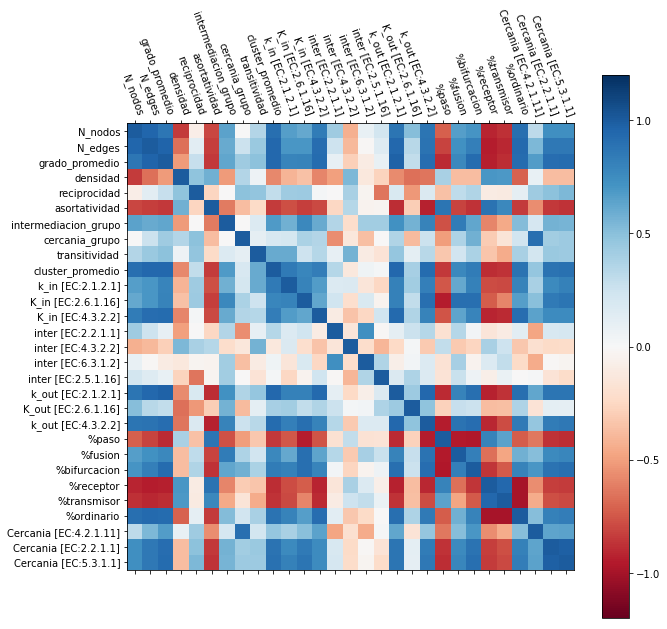

In [322]:
tabla=Tabla.iloc[:,1:len(Tabla.T)]
del tabla['H']

# index=[i for i in tabla.columns ] # Lista de los nombres de las columnas 
index= Index

figure = plt.figure(3,figsize=(10,10)) 
axes = figure.add_subplot(111) 
  
# using the matshow() function  
caxes = axes.matshow(tabla.corr() ,  cmap='RdBu', vmin=-1.2, vmax=1.2, interpolation ='nearest') 
figure.colorbar(caxes) 

# ... Tamaño de los labels
axes.set_xticks(np.arange(len(index)))
axes.set_yticks(np.arange(len(index)))

# ... and label them with the respective list entries
axes.set_xticklabels(index) 
axes.set_yticklabels(index) 

# Rotate the tick labels and set their alignment.
plt.setp(axes.get_xticklabels(), rotation=-70, ha="right",
         rotation_mode="anchor")

# plt.savefig('corr.pdf')
plt.show() 

Podemos aqui mirar como se comporta un ___ACP sobre las variables___ . Y ver que grupo de ellas son mas cercanas

In [214]:
# tabla=tabla.iloc[:,0:len(tabla.T)-1]
# tabla=tabla.reset_index()
# del tabla['index']

X=tabla.T.values
y=np.array(Index)
#---------------------------------------

X_std=StandardScaler().fit_transform(X)
acp=sk_acp(n_components=4)
Y=acp.fit_transform(X_std)
results=[]

for name in y:
    result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
                   mode= 'markers', name=name,
                   marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
                                  opacity= 0.75 ))
    results.append(result)
    
    
data=Data(results)
layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False), title = 'ACP para los 13 organismos' )

fig = Figure(data=data , layout= layout )
py.iplot(fig )

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Francisco R laza\Ana

Para hacer la __Matriz de Correlaciones en Plotly__ hacemos:           

In [323]:
trace1 = {
  "type": "heatmap", 
  "x": index , 
  "y": index, 
  "z": tabla.corr() }

data = Data([trace1])
layout = {"title": "Features Correlation Matrix"}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

### Hacemos una reduccion dimensional mediante la matriz de correlaciones. 

In [215]:
n_tabla=Tabla.copy()
del n_tabla['N_edges'], n_tabla['H'] , n_tabla['%transmisor'] , n_tabla['glycine hydroxymethyltransferase [EC:2.1.2.1]_y']
del n_tabla['cluster_promedio'] , n_tabla['adenylosuccinate lyase [EC:4.3.2.2]_x'] ,n_tabla['adenylosuccinate lyase [EC:4.3.2.2]']
del n_tabla['%negativo'] , n_tabla['%ordinario'] , n_tabla['transketolase [EC:2.2.1.1]_y'] , n_tabla['triosephosphate isomerase (TIM) [EC:5.3.1.1]']
del n_tabla['enolase [EC:4.2.1.11]'] , n_tabla['glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_x']

Esta elminacion de variables se hace por la correlacion superior al 90% entre variables:   
>grado_promedio  = N_edges 97% = k_out [EC:2.1.2.1] 97% =Cluster_promedio 94% = k_in [EC:4.3.2.2] 92% =K_out [EC:4.3.2.2] 91% = %Bifuracacion 93% = %ordinario 92% = Cercania [EC:2.2.1.1] 91% = Cercania [EC:5.3.1.1] 91%

>Cercania_grupo = Cercania[EC:4.2.1.11] 91% 

> %fusion = k_in[EC:2.6.1.16] 90%

              

In [219]:
n_index=['N_nodos', 
         'grado_promedio', 
         'densidad', 
         'reciprocidad',
         'asortatividad', 
         'intermediacion_grupo', 
         'cercania_grupo',
         'transitividad',  
         'k_out [EC:2.1.2.1]',
         'inter [EC:2.2.1.1]', 
         'inter [EC:4.3.2.2]',
         'inter [EC:6.3.1.2]',
         'inter [EC:2.5.1.16]',
         'k_out [EC:2.6.1.16]',
         '%paso', 
         '%fusion', 
         '%receptor']

In [330]:
tabla=n_tabla.iloc[:,1:len(n_tabla.T)]

# index=[i for i in tabla.columns ] # Lista de los nombres de las columnas 
index=n_index

# figure = plt.figure(3,figsize=(10,10)) 
# axes = figure.add_subplot(111) 
  
# # using the matshow() function  
# caxes = axes.matshow(tabla.corr() ,  cmap='RdBu', vmin=-1.2, vmax=1.2, interpolation ='nearest') 
# figure.colorbar(caxes) 

# # ... Tamaño de los labels
# axes.set_xticks(np.arange(len(index)))
# axes.set_yticks(np.arange(len(index)))

# # ... and label them with the respective list entries
# axes.set_xticklabels(index) 
# axes.set_yticklabels(index) 

# # Rotate the tick labels and set their alignment.
# plt.setp(axes.get_xticklabels(), rotation=-70, ha="right",
#          rotation_mode="anchor")

# # plt.savefig('corr_n.pdf')
# plt.show() 

trace1 = {
  "type": "heatmap", 
  "x": index , 
  "y": index, 
  "z": tabla.corr() }

data = Data([trace1])
layout = {"title": "Features Correlation Matrix"}
fig = Figure(data=data, layout=layout)
py.iplot(fig)

#### APC de la matriz reduccida 

In [329]:
ListaOrg=[ i[0] for i in org]

X=n_tabla.iloc[:,1:len(n_tabla.T)].values
# y=n_tabla.iloc[:,0].values
y=np.array(ListaOrg)
#---------------------------------------

X_std=StandardScaler().fit_transform(X)
acp=sk_acp(n_components=4)
Y=acp.fit_transform(X_std)
results=[]

for name in y:
    result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
                   mode= 'markers', name=name,
                   marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
                                  opacity= 0.75 ))
    results.append(result)
    
    
data=Data(results)
layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False) )
# , title = 'ACP para los 13 organismos'
fig = Figure(data=data , layout= layout )
py.iplot(fig )

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Francisco R laza\Ana

Podemos hacer un __ACP de estas nuevas variables__ para ver cual de ellas son mas cercanas. 

In [272]:
nn_tabla=n_tabla.T
nn_tabla['Nombre_']=nn_tabla.index
nn_tabla.columns = nn_tabla.iloc[0]
nn_tabla=nn_tabla.drop(['Nombre'])

In [234]:
tabla=nn_tabla.iloc[:,0:len(nn_tabla.T)-1]
tabla=tabla.reset_index()
del tabla['index']

X=tabla.values
y=np.array(n_index)
#---------------------------------------

X_std=StandardScaler().fit_transform(X)
acp=sk_acp(n_components=4)
Y=acp.fit_transform(X_std)
results=[]

for name in y:
    result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
                   mode= 'markers', name=name,
                   marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
                                  opacity= 0.75 ))
    results.append(result)
    
    
data=Data(results)
layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False), title = 'ACP para los 13 organismos' )

fig = Figure(data=data , layout= layout )
py.iplot(fig )

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Fra

# Biplot

In [279]:
n_tabla

,Nombre,N_nodos,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,glycine hydroxymethyltransferase [EC:2.1.2.1]_x,transketolase [EC:2.2.1.1]_x,adenylosuccinate lyase [EC:4.3.2.2]_y,glutamine synthetase [EC:6.3.1.2],spermidine synthase [EC:2.5.1.16],glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_y,%cero,%positivo,%receptor
0,sai,276,1.757246,0.012780,0.247423,0.327979,0.029347,0.154181,0.212862,3,0.000867,0.001221,0.000053,0.000159,2,29.347826,35.144928,15.942029
1,tac,240,1.962500,0.016423,0.280255,0.367196,0.043332,0.139514,0.302694,7,0.001093,0.027748,0.000437,0.000193,4,29.166667,35.416667,17.916667
2,eco,682,2.655425,0.007799,0.192159,0.313523,0.083856,0.127802,0.250179,7,0.009917,0.006400,0.003217,0.017340,7,25.073314,37.683284,12.316716
3,hsa,803,3.818182,0.009522,0.270059,0.240585,0.080188,0.159407,0.274731,11,0.007258,0.004746,0.003453,0.006425,5,17.808219,40.597758,9.838107
4,ptr,811,3.771887,0.009313,0.264139,0.239629,0.082719,0.159345,0.278135,11,0.006970,0.004973,0.003398,0.006178,5,17.879162,40.567201,9.864365
5,ath,787,2.628971,0.006689,0.245529,0.262880,0.077624,0.102513,0.263467,9,0.045338,0.007483,0.018339,0.002575,6,23.252859,39.263024,13.087675
6,mmu,796,3.709799,0.009333,0.263461,0.209955,0.084099,0.156519,0.275359,11,0.008917,0.005941,0.003535,0.006282,5,18.341709,40.075377,9.422111
7,cac,414,2.118357,0.010258,0.216648,0.359466,0.059443,0.115749,0.236584,6,0.003527,0.008694,0.000150,0.000870,6,28.260870,35.507246,15.942029
8,cel,483,2.842650,0.011795,0.268026,0.267403,0.067334,0.162839,0.261595,11,0.009546,0.012575,0.002762,0.001255,6,19.875776,39.130435,12.836439
9,dme,522,2.752874,0.010568,0.268615,0.237661,0.089915,0.144918,0.239993,11,0.006417,0.013756,0.001936,0.000565,6,20.881226,40.038314,12.835249


In [267]:
m_tabla = n_tabla.copy()
del m_tabla['Nombre']
dummisvariables=np.identity(len(m_tabla.columns))
# m_index=pd.DataFrame(n_index)
# m_index.values
# n_tabla.columns

In [311]:
complemento=pd.DataFrame(dummisvariables, index = m_tabla.columns , columns=m_tabla.columns  )
complemento =complemento.reset_index()
complemento['index']=n_index
complemento.rename(columns = {  'index':'Nombre',
                                'N_nodos':'N_nodos',
                                'grado_promedio':'grado_promedio',
                                'densidad':'densidad',
 'reciprocidad':'reciprocidad',
 'asortatividad':'asortatividad',
 'intermediacion_grupo': 'intermediacion_grupo',
 'cercania_grupo':'cercania_grupo',
 'transitividad':'transitividad',
 'glycine hydroxymethyltransferase [EC:2.1.2.1]_x': 'glycine hydroxymethyltransferase [EC:2.1.2.1]_x',
 'transketolase [EC:2.2.1.1]_x': 'transketolase [EC:2.2.1.1]_x',
 'adenylosuccinate lyase [EC:4.3.2.2]_y':  'adenylosuccinate lyase [EC:4.3.2.2]_y',
 'glutamine synthetase [EC:6.3.1.2]': 'glutamine synthetase [EC:6.3.1.2]',
 'spermidine synthase [EC:2.5.1.16]': 'spermidine synthase [EC:2.5.1.16]' ,
 'glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_y' :  'glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_y' ,
 '%cero' :'%cero',
 '%positivo' :'%positivo',
 '%receptor':'%receptor'},inplace=True  )
complemento

,Nombre,N_nodos,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,glycine hydroxymethyltransferase [EC:2.1.2.1]_x,transketolase [EC:2.2.1.1]_x,adenylosuccinate lyase [EC:4.3.2.2]_y,glutamine synthetase [EC:6.3.1.2],spermidine synthase [EC:2.5.1.16],glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_y,%cero,%positivo,%receptor
0,N_nodos,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,grado_promedio,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,densidad,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,reciprocidad,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,asortatividad,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,intermediacion_grupo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,cercania_grupo,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,transitividad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,k_out [EC:2.1.2.1],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,inter [EC:2.2.1.1],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
df=pd.concat([n_tabla,complemento])
df

,Nombre,N_nodos,grado_promedio,densidad,reciprocidad,asortatividad,intermediacion_grupo,cercania_grupo,transitividad,glycine hydroxymethyltransferase [EC:2.1.2.1]_x,transketolase [EC:2.2.1.1]_x,adenylosuccinate lyase [EC:4.3.2.2]_y,glutamine synthetase [EC:6.3.1.2],spermidine synthase [EC:2.5.1.16],glutamine---fructose-6-phosphate transaminase (isomerizing) [EC:2.6.1.16]_y,%cero,%positivo,%receptor
0,sai,276.0,1.757246,0.012780,0.247423,0.327979,0.029347,0.154181,0.212862,3.0,0.000867,0.001221,0.000053,0.000159,2.0,29.347826,35.144928,15.942029
1,tac,240.0,1.962500,0.016423,0.280255,0.367196,0.043332,0.139514,0.302694,7.0,0.001093,0.027748,0.000437,0.000193,4.0,29.166667,35.416667,17.916667
2,eco,682.0,2.655425,0.007799,0.192159,0.313523,0.083856,0.127802,0.250179,7.0,0.009917,0.006400,0.003217,0.017340,7.0,25.073314,37.683284,12.316716
3,hsa,803.0,3.818182,0.009522,0.270059,0.240585,0.080188,0.159407,0.274731,11.0,0.007258,0.004746,0.003453,0.006425,5.0,17.808219,40.597758,9.838107
4,ptr,811.0,3.771887,0.009313,0.264139,0.239629,0.082719,0.159345,0.278135,11.0,0.006970,0.004973,0.003398,0.006178,5.0,17.879162,40.567201,9.864365
5,ath,787.0,2.628971,0.006689,0.245529,0.262880,0.077624,0.102513,0.263467,9.0,0.045338,0.007483,0.018339,0.002575,6.0,23.252859,39.263024,13.087675
6,mmu,796.0,3.709799,0.009333,0.263461,0.209955,0.084099,0.156519,0.275359,11.0,0.008917,0.005941,0.003535,0.006282,5.0,18.341709,40.075377,9.422111
7,cac,414.0,2.118357,0.010258,0.216648,0.359466,0.059443,0.115749,0.236584,6.0,0.003527,0.008694,0.000150,0.000870,6.0,28.260870,35.507246,15.942029
8,cel,483.0,2.842650,0.011795,0.268026,0.267403,0.067334,0.162839,0.261595,11.0,0.009546,0.012575,0.002762,0.001255,6.0,19.875776,39.130435,12.836439
9,dme,522.0,2.752874,0.010568,0.268615,0.237661,0.089915,0.144918,0.239993,11.0,0.006417,0.013756,0.001936,0.000565,6.0,20.881226,40.038314,12.835249


In [316]:
df['Nombre'].values

array(['sai', 'tac', 'eco', 'hsa', 'ptr', 'ath', 'mmu', 'cac', 'cel',
       'dme', 'lma', 'sce', 'sfx', 'N_nodos', 'grado_promedio',
       'densidad', 'reciprocidad', 'asortatividad',
       'intermediacion_grupo', 'cercania_grupo', 'transitividad',
       'k_out [EC:2.1.2.1]', 'inter [EC:2.2.1.1]', 'inter [EC:4.3.2.2]',
       'inter [EC:6.3.1.2]', 'inter [EC:2.5.1.16]', 'k_out [EC:2.6.1.16]',
       '%paso', '%fusion', '%receptor'], dtype=object)

In [317]:
# ListaOrg=[ i[0] for i in org]

X=df.iloc[:,1:len(df.T)].values
# y=n_tabla.iloc[:,0].values
y=df['Nombre'].values
#---------------------------------------

X_std=StandardScaler().fit_transform(X)
acp=sk_acp(n_components=4)
Y=acp.fit_transform(X_std)
results=[]

for name in y:
    result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
                   mode= 'markers', name=name,
                   marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
                                  opacity= 0.75 ))
    results.append(result)
    
    
data=Data(results)
layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False), title = 'ACP para los 13 organismos' )

fig = Figure(data=data , layout= layout )
py.iplot(fig )

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Francisco R laza\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Francisco R laza\Ana

In [22]:
Bitable=tabla.T.copy()
# # Bitable['Nombre']=BiTable.index
# Bitable

In [79]:
# nn_tabla=n_tabla.T.copy()
# nn_tabla.columns = nn_tabla.iloc[0]
# nn_tabla=nn_tabla.drop(['Nombre'])
# nn_tabla['Nombre_']=nn_tabla.index
# nn_tabla.iloc[:,0:len(nn_tabla.T)-1]

In [ ]:
# y=Tabla.iloc[:,0].values
# #---------------------------------------
# X_std=StandardScaler().fit_transform(X)
# acp=sk_acp(n_components=4)
# Y=acp.fit_transform(X_std)
# results=[]

# for name in ListaOrg:
#     result= Scatter(x = Y[y==name,0] , y=Y[y==name,1], 
#                    mode= 'markers', name=name,
#                    marker = Marker( size=15 , line=Line(color='rgba(225,225,225,0.2)',width=0.5), 
#                                   opacity= 0.75 ))
#     results.append(result)
    
    
# data=Data(results)
# layout=Layout(xaxis=XAxis(title='CP1', showline=False), yaxis=YAxis(title='CP2', showline=False), title = 'ACP para los 13 organismos' )

# fig = Figure(data=data , layout= layout )
# py.iplot(fig )

In [81]:
# tabla=nn_tabla.iloc[:,0:len(nn_tabla.T)-1]
# tabla

In [80]:
# index=[i for i in nn_tabla.iloc[:,len(nn_tabla.T)-1].values]
# index
# # nn_tabla.iloc[:,len(nn_tabla)]
# len(nn_tabla)
# # nn_tabla.iloc[:,17].values
# nn_tabla.T.index.values

In [149]:
tabla=nn_tabla.iloc[:,0:len(nn_tabla.T)-1]
tabla=tabla.reset_index()
del tabla['index']
tabla=pd.DataFrame(tabla.values)
tabla

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,276,240,682,803,811,787,796,414,483,522,288,495,610
1,1.75725,1.9625,2.65543,3.81818,3.77189,2.62897,3.7098,2.11836,2.84265,2.75287,2.05556,2.53131,2.53607
2,0.01278,0.0164226,0.00779861,0.00952165,0.0093133,0.00668949,0.00933283,0.0102584,0.0117952,0.0105677,0.0143244,0.0102482,0.00832862
3,0.247423,0.280255,0.192159,0.270059,0.264139,0.245529,0.263461,0.216648,0.268026,0.268615,0.25,0.252195,0.188752
4,0.327979,0.367196,0.313523,0.240585,0.239629,0.26288,0.209955,0.359466,0.267403,0.237661,0.332227,0.290489,0.272465
5,0.0293467,0.0433322,0.0838561,0.0801878,0.0827186,0.0776242,0.084099,0.0594426,0.0673335,0.0899154,0.0852429,0.0743791,0.066824
6,0.154181,0.139514,0.127802,0.159407,0.159345,0.102513,0.156519,0.115749,0.162839,0.144918,0.146302,0.127624,0.137226
7,0.212862,0.302694,0.250179,0.274731,0.278135,0.263467,0.275359,0.236584,0.261595,0.239993,0.233597,0.264965,0.244448
8,3,7,7,11,11,9,11,6,11,11,4,11,7
9,0.000867065,0.00109291,0.00991661,0.00725794,0.00697005,0.0453375,0.0089168,0.00352714,0.00954603,0.00641708,0.0118316,0.0081906,0.00378298


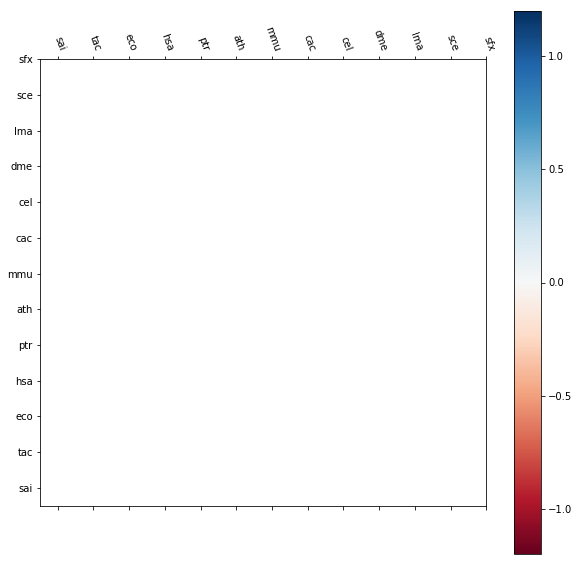

In [105]:
tabla=nn_tabla.iloc[:,0:len(nn_tabla.T)-1]
tabla=tabla.reset_index()
del tabla['index']

# index=[i for i in tabla.columns ] # Lista de los nombres de las columnas 
# index=[i for i in nn_tabla.T.index.values if i != "Nombre_"]

index=[ i[0] for i in org]

figure = plt.figure(3,figsize=(10,10)) 
axes = figure.add_subplot(111) 
  
# using the matshow() function  
caxes = axes.matshow(tabla.corr() ,  cmap='RdBu', vmin=-1.2, vmax=1.2, interpolation ='nearest') 
figure.colorbar(caxes) 

# ... Tamaño de los labels
axes.set_xticks(np.arange(len(index)))
axes.set_yticks(np.arange(len(index)))

# ... and label them with the respective list entries
axes.set_xticklabels(index) 
axes.set_yticklabels(index) 

# Rotate the tick labels and set their alignment.
plt.setp(axes.get_xticklabels(), rotation=-70, ha="right",
         rotation_mode="anchor")

# plt.savefig('corr_n.pdf')
plt.show() 

# trace1 = {
#   "type": "heatmap", 
#   "x": index , 
#   "y": index, 
#   "z": tabla.corr() }

# data = Data([trace1])
# layout = {"title": "Features Correlation Matrix"}
# fig = Figure(data=data, layout=layout)
# py.iplot(fig)

NameError: name 'scores' is not defined

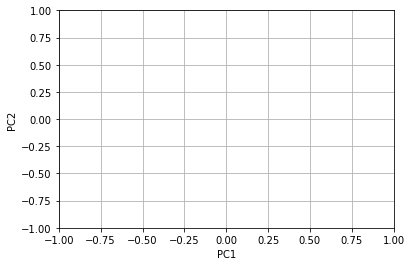

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
from matplotlib.mlab import PCA
 
import numpy as np
import matplotlib.pyplot as plt
 
from matplotlib.mlab import PCA
 
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n=coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
 
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
 
# test
 
data=np.random.rand(100,10)*10
pca=PCA(scores)
 
biplot(pca.Y[:,0:2],pca.Wt[:,0:2])
plt.show()

### Intento fallido de graficar la varibale explicada.
Se necesita corregir el problema de los valores complejos

In [326]:
# mean_vect = np.mean(X_std , axis=0)

In [327]:
# cov_matrix = (X_std - mean_vect).T.dot((X_std-mean_vect))/(X_std.shape[0]-1)

In [331]:
# cov_matrix

In [329]:
# eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

In [332]:
# eig_vectors

In [333]:
# eigen_pairs=[(np.abs(eig_vals[i]),eig_vectors[:,i]) for i in range(len(eig_vals))]
# eigen_pairs

In [334]:
# total_sum= sum(eig_vals)
# var_exp =[(i/total_sum)*100 for i in eig_vals ]
# var_exp

In [335]:
# cum_var_exp= np.cumsum(var_exp)
# cum_var_exp

In [336]:
# plot1 = Bar(x=['CP %s'%i for i in range(1,len(Tabla.T))] , y=var_exp , showlegend=False)
# # plot2 = Scatter(x=['CP %s'%i for i in range (1,len(Tabla.T))], y= cum_var_exp , showlegend= True , name=' Varianza Explicada Acumulada')

# data = Data([plot1])
# # data = Data([plot1,plot2])

In [337]:
# layout=Layout(xaxis=XAxis(title='componentes principales'),
#              yaxis=YAxis(title='Porcentaje de varianza explicada'),
#              title='Porcentaje de variabilidad explicada por cada componente')

# fig = Figure(data,layout)
# py.iplot(fig)

In [71]:
# Grafica con formato .HTML
# from pyvis import network as net
# g=net.Network(height="750px", width="100%", bgcolor="#FFFFFF", font_color="white",notebook=True)
# g.from_nx(G_hsa)
# g.show("example.html")